## Node
**Node**는 LangGraph에서 **개별 작업을 수행하는 기본 단위**입니다.   
각 노드는 현재 상태를 입력으로 받아 특정 작업을 수행한 후, 결과를 상태에 반영합니다.

### Node의 핵심 특징

#### 1. **독립성 (Independence)**
- 각 노드는 독립적으로 정의되고 실행됩니다
- 다른 노드에 의존하지 않고 자체적인 로직을 가집니다

#### 2. **입출력 (Input/Output)**
- **입력**: 현재 상태(State) 객체
- **출력**: 업데이트된 상태(State) 객체

#### 3. **재사용성 (Reusability)**
- 동일한 노드를 여러 그래프에서 재사용 가능
- 모듈화된 설계로 유지보수 용이

### Node의 기본 구조

```python
def my_node(state):
    # 1. 상태에서 필요한 데이터 추출
    input_data = state.get("some_key")
    
    # 2. 작업 수행 (예: 데이터 처리, LLM 호출, API 호출 등)
    result = process_data(input_data)
    
    # 3. 결과를 상태에 반영
    state["output_key"] = result
    
    # 4. 업데이트된 상태 반환
    return state
```

### Node가 수행할 수 있는 작업들

1. **LLM 호출**
   - ChatGPT, Claude 등의 언어 모델 호출
   - 프롬프트 처리 및 응답 생성

2. **데이터 처리**
   - 텍스트 가공, 형식 변환
   - 계산 및 분석 작업

3. **외부 API 호출**
   - 웹 검색, 데이터베이스 조회
   - 외부 서비스 통합

4. **도구 사용**
   - 계산기, 달력, 파일 시스템 접근
   - 전문 도구 및 라이브러리 활용

5. **조건 판단**
   - 상태 확인 및 분기 결정
   - 품질 검증 및 오류 처리

> **Node 설계 팁**
> - Node는 단일 책임 원칙(Single Responsibility Principle)을 따르는 것이 좋습니다
> - 너무 큰 기능을 하나의 Node에 담지 말고, 작은 단위로 나누어 구현하세요
> - 작은 단위로 구성할수록 재사용성이 높아지고 디버깅이 쉬워집니다



In [1]:
%pip install langgraph


   ------------- -------------------------- 2/6 [langgraph-sdk]
   -------------------- ------------------- 3/6 [langgraph-checkpoint]
   -------------------------- ------------- 4/6 [langgraph-prebuilt]
   --------------------------------- ------ 5/6 [langgraph]
   --------------------------------- ------ 5/6 [langgraph]
   --------------------------------- ------ 5/6 [langgraph]
   --------------------------------- ------ 5/6 [langgraph]
   ---------------------------------------- 6/6 [langgraph]

Note: you may need to restart the kernel to use updated packages.


### TypedDict 란?
딕셔너리의 키(key)와 그에 해당하는 값(value)의 타입을 명시적으로 지정할 수 있게 해주는 도구  
딕셔너리를 사용하되, 특정 키에는 특정 타입의 값만 들어가도록 구조를 정의하고 싶을 때 사용  

**특징**
- 정적 타입 체커이기 때문에 런타임에는 일반 딕셔너리랑 동일하게 작동
- mypy를 사용하거나 IDE의 타입 체킹기능을 On하면 확인 가능

  
  
> **VS코드 타입체커 사용법**
> 1. ctrl + , (기본설정 -> 설정 이동)
> 2. Type Checking Mode 검색
> 3. Pylance의 Checking Mode "basic"으로 설정

In [2]:
from typing import Dict, TypedDict

# 일반적인 파이썬 딕셔너리
normal_dict: Dict[str, str] = {
    "name": "bear", 
    "age": "20",
    "job": "강사"
}

# TypedDict로 정의한 딕셔너리
class Person(TypedDict):
    name: str
    age: int 
    job: str

typed_dict: Person = {
    "name": "bear",
    "age": 20, 
    "job": "강사"
}

In [3]:
# 일반 dict의 경우
normal_dict["age"] = 30 # 문자열에서 정수로 변경되어도 문제 없음.
normal_dict["new"] = "추가적인 내용" # 새필드 추가가능

print(normal_dict)

{'name': 'bear', 'age': 30, 'job': '강사', 'new': '추가적인 내용'}


In [6]:
#TypedDict의 경우
typed_dict["age"] = 30 # 정수형으로 올바르게 사용
print(typed_dict)

typed_dict["age"] = "30" 
print(typed_dict)

{'name': 'bear', 'age': 30, 'job': '강사'}
{'name': 'bear', 'age': '30', 'job': '강사'}


1. 상태(State) 정의하기
- State는 TypedDict 라는 Python 문법으로 정의한다.

In [7]:
# 상태 클래스 정의
class State(TypedDict):
    """
    그래프에서 사용할 상태 정의
    - input_text: 입력 텍스트
    - processed_text: 처리된 텍스트
    - word_count: 단어 수
    """
    input_text: str
    processed_text: str
    word_count: int

2. 첫 번째 Node 만들기
- 이제 텍스트를 대문자로 변환하는 간단한 노드 만들기

In [8]:
# 텍스트를 대문자로 변환해주는 노드
def text_processor_node(state: State) -> State:

    # 1. 상태에서 입력 텍스트 가져오기
    input_text = state["input_text"]
    
    # 2. 텍스트를 대문자로 변환
    processed_text = input_text.upper()
    
    # 3. 결과를 상태에 저장
    state["processed_text"] = processed_text
    
    return state

3. 두 번째 Node 만들기
- 이번에는 단어 수를 세는 노드를 만들어보겠습니다.


In [9]:
# 단어 수를 세는 노드
def word_counter_node(state: State) -> State:
    
    # 1. 처리된 텍스트 가져오기
    processed_text = state["processed_text"]
    
    # 2. 단어 수 계산
    word_count = len(processed_text.split())
    
    # 3. 결과를 상태에 저장
    state["word_count"] = word_count
    
    return state


4. 그래프 구성하기

In [10]:
from langgraph.graph import StateGraph, START, END

# 1. 그래프 생성
workflow = StateGraph(State)

# 2. 노드들을 그래프에 추가
workflow.add_node("text_processor", text_processor_node)
workflow.add_node("word_counter", word_counter_node)

# 3. 엣지(연결) 설정
workflow.add_edge(START, "text_processor")  # 시작 → 텍스트 처리
workflow.add_edge("text_processor", "word_counter")  # 텍스트 처리 → 단어 카운터
workflow.add_edge("word_counter", END)  # 단어 카운터 → 끝

# 4. 그래프 컴파일
graph = workflow.compile()

5. 그래프 실행하기

In [12]:
initial_state = {
    "input_text": "안녕하세요 LangGraph를 배우고 있습니다",
    "processed_text": "",
    "word_count": 0
}

# 그래프 실행
final_state = graph.invoke(initial_state)

print("최종 결과:")
print(f"원본 텍스트: {final_state['input_text']}")
print(f"처리된 텍스트: {final_state['processed_text']}")
print(f"단어 수: {final_state['word_count']}")
print("그래프 실행 완료!")


최종 결과:
원본 텍스트: 안녕하세요 LangGraph를 배우고 있습니다
처리된 텍스트: 안녕하세요 LANGGRAPH를 배우고 있습니다
단어 수: 4
그래프 실행 완료!


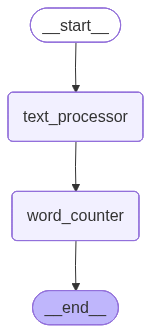

In [11]:
from IPython.display import Image, display

try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    pass